In [1]:
import numpy as np
from pyprojroot.here import here
import pandas as pd

data = pd.read_excel(here("data/por-municipios.xlsx"))
data

,Year,Month,Date,District,Municipality,parish,Voltage level,Active Energy (kWh),DistrictCode,DistrictMunicipalityCode,DistrictMunicipalityParishCode
0,2023,5,2023-05,SANTAREM,Rio Maior,UF AZAMBUJEIRA E MALAQUEIJO,"Muito Alta, Alta e Média Tensões",42889.398,14,1414,141415
1,2023,5,2023-05,SETUBAL,Sesimbra,SESIMBRA (SANTIAGO),"Muito Alta, Alta e Média Tensões",501913.130,15,1511,151102
2,2023,5,2023-05,VILA REAL,Murça,JOU,Baixa Tensão,70955.155,17,1707,170704
3,2023,5,2023-05,VILA REAL,Santa Marta de Penaguião,SEVER,"Muito Alta, Alta e Média Tensões",52292.716,17,1711,171110
4,2023,5,2023-05,VISEU,Armamar,SAO MARTINHO DAS CHAS,Baixa Tensão,95161.235,18,1801,180115
...,...,...,...,...,...,...,...,...,...,...,...
165019,2022,7,2022-07,BRAGANCA,Vinhais,VINHAIS,"Muito Alta, Alta e Média Tensões",63732.258,4,412,041235
165020,2022,7,2022-07,COIMBRA,Figueira da Foz,MARINHA DAS ONDAS,Baixa Tensão,434881.302,6,605,060508
165021,2022,7,2022-07,FARO,Alcoutim,MARTIM LONGO,Baixa Tensão,162904.786,8,802,080203
165022,2022,7,2022-07,LEIRIA,Pedrógão Grande,GRACA,Baixa Tensão,107855.195,10,1013,101301


In [2]:
data['Year'].unique()

array([2023, 2020, 2021, 2022], dtype=int64)

In [3]:
from cartopy.io.shapereader import Reader as shpreader, Record
from pprint import pprint as pp
from icecream import ic
import numpy as np
import numpy.typing as npt

file_path = here("shape/concelhos.shp")

reader = shpreader(file_path)
records: list[Record] = np.fromiter(reader.records(), dtype=Record)
reader.close()
records[:10]

Cannot find header.dxf (GDAL_DATA is not defined)


array([<Record: <POLYGON ((-7.793 38.765, -7.793 38.765, -7.793 38.765, -7.793 38.765, -7.79...>, {'ID_0': 182, 'ISO': 'PRT', 'NAME_0': 'Portugal', 'ID_1': 1, 'NAME_1': 'Évora', 'ID_2': 1, 'NAME_2': 'Évora', 'HASC_2': 'PT.EV.EV', 'CCN_2': 0, 'CCA_2': '0705', 'TYPE_2': 'Concelho', 'ENGTYPE_2': 'Municipality', 'NL_NAME_2': None, 'VARNAME_2': None}, <fields>>,
       <Record: <POLYGON ((-7.259 38.774, -7.259 38.773, -7.259 38.773, -7.259 38.773, -7.25...>, {'ID_0': 182, 'ISO': 'PRT', 'NAME_0': 'Portugal', 'ID_1': 1, 'NAME_1': 'Évora', 'ID_2': 2, 'NAME_2': 'Alandroal', 'HASC_2': 'PT.EV.AL', 'CCN_2': 0, 'CCA_2': '0701', 'TYPE_2': 'Concelho', 'ENGTYPE_2': 'Municipality', 'NL_NAME_2': None, 'VARNAME_2': None}, <fields>>,
       <Record: <POLYGON ((-7.886 38.925, -7.886 38.925, -7.886 38.925, -7.885 38.925, -7.88...>, {'ID_0': 182, 'ISO': 'PRT', 'NAME_0': 'Portugal', 'ID_1': 1, 'NAME_1': 'Évora', 'ID_2': 3, 'NAME_2': 'Arraiolos', 'HASC_2': 'PT.EV.AR', 'CCN_2': 0, 'CCA_2': '0702', 'TYPE_2': 'Co

In [4]:
# get boundaries using only portugal continental
atrs = [i.attributes for i in records]
df = pd.DataFrame(atrs)
df

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,182,PRT,Portugal,20,Viseu,302,Tarouca,PT.VI.TR,0,1820,Concelho,Municipality,None,None
304,182,PRT,Portugal,20,Viseu,303,Tondela,PT.VI.TO,0,1821,Concelho,Municipality,None,None
305,182,PRT,Portugal,20,Viseu,304,Vila Nova de Paiva,PT.VI.VP,0,1822,Concelho,Municipality,None,None
306,182,PRT,Portugal,20,Viseu,305,Viseu,PT.VI.VS,0,1823,Concelho,Municipality,None,None


In [5]:
df["NAME_1"].unique()

array(['Évora', 'Aveiro', 'Azores', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Faro', 'Guarda', 'Leiria', 'Lisboa',
       'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu'], dtype=object)

In [6]:
portugal_geometries = [i.geometry for i in records if i.attributes["NAME_1"] not in ["Azores", "Madeira"]]
import geopandas as gpd
gdf = gpd.GeoDataFrame(geometry=portugal_geometries)
# gdf.to_file(here("shape/concelhos_continental.geojson"), driver="GeoJSON")
minx, miny, maxx, maxy = ic(gdf.total_bounds)

ic| gdf.total_bounds: array([-9.54708195, 36.96097183, -6.18914223, 42.15431595])


C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


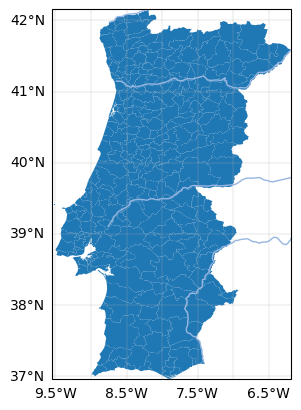

In [13]:
from cartopy import feature as features
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature

# define a Coordinate Reference System (CRS)
crs = ccrs.PlateCarree()
# Create a figure and axes with the defined CRS
fig, ax = plt.subplots(subplot_kw={"projection": crs})

ax.add_geometries(gdf.geometry, crs=crs)
ax.set_extent([minx, maxx, miny, maxy], crs=crs)
ax.gridlines(draw_labels=["bottom", "left"], linewidth = 0.2)

plt.show()